<a href="https://colab.research.google.com/github/sheemambabu/CMPE-297-Special-Topics/blob/main/Assignment_4/Image_Deep_AutoVIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deep_autoviml
!pip install kaggle

     |████████████████████████████████| 139 kB 4.3 MB/s 
     |████████████████████████████████| 308 kB 22.6 MB/s 
     |████████████████████████████████| 170 kB 56.6 MB/s 
     |████████████████████████████████| 4.3 MB 33.9 MB/s 
     |████████████████████████████████| 454.4 MB 9.3 kB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 14.5 MB 66 kB/s 
     |████████████████████████████████| 1.2 MB 35.4 MB/s 
     |████████████████████████████████| 462 kB 47.6 MB/s 
     |████████████████████████████████| 4.0 MB 45.5 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 209 kB 55.7 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 57.4 MB/s 
     |████████████████████████████████| 112 kB 54.4 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sh

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Download Data from kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheemamurugeshbabu","key":"d8495fdd9a753c308915990ee0e22e2b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 93% 81.0M/86.8M [00:04<00:00, 13.2MB/s]
100% 86.8M/86.8M [00:04<00:00, 19.2MB/s]


In [ ]:
! unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:
! ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [ ]:
import shutil

shutil.move("/content/Training/","/content/data_folder/train")

'/content/data_folder/train'

In [ ]:
shutil.move("/content/Testing/","/content/data_folder/test")

'/content/data_folder/test'

In [ ]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
img_height = 224
img_width = 224
img_channels = 3

In [ ]:
target = 'image' 
image_dir='/content/data_folder'
train_image_dir='/content/data_folder/train'
test_image_dir='/content/data_folder/test'

In [ ]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/data_folder
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/data_folder. Returning...
Found 2870 files belonging to 4 classes.

Splitting train into two: train and validation data
Number of image classes = 4 and they are: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Training image model. This will take time...
Epoch 1/3
22/22 [==============================] - 70s 3s/step - loss: 1.3690 - accuracy: 0.4233 - val_loss: 0.8880 - val_accuracy: 0.6545
Epoch 2/3
22/22 [==============================] - 56s 3s/step - loss: 0.8370 - accuracy: 0.6513 - val_loss: 0.6450 - val_accuracy: 0.7552
Epoch 3/3
9/9 [==============================] - 16s 2s/step - loss: 0.5521 - accuracy: 0.7865
    Model accuracy in Image validation data: 0.78645831346

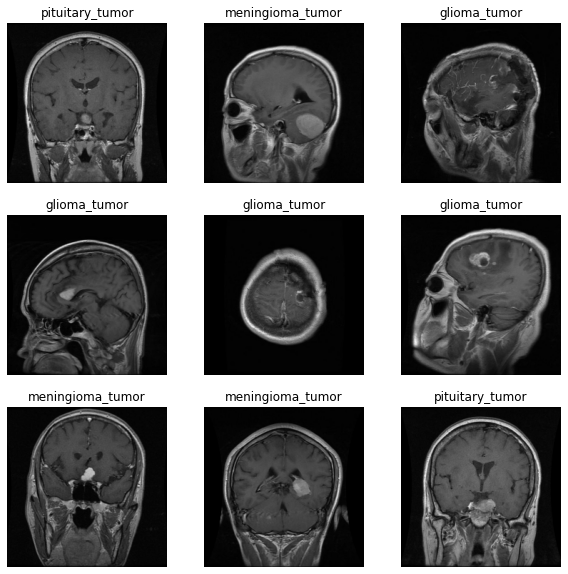

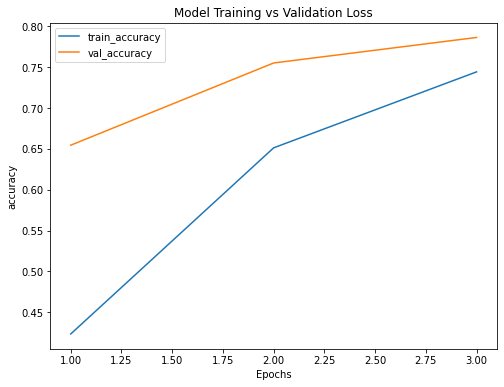

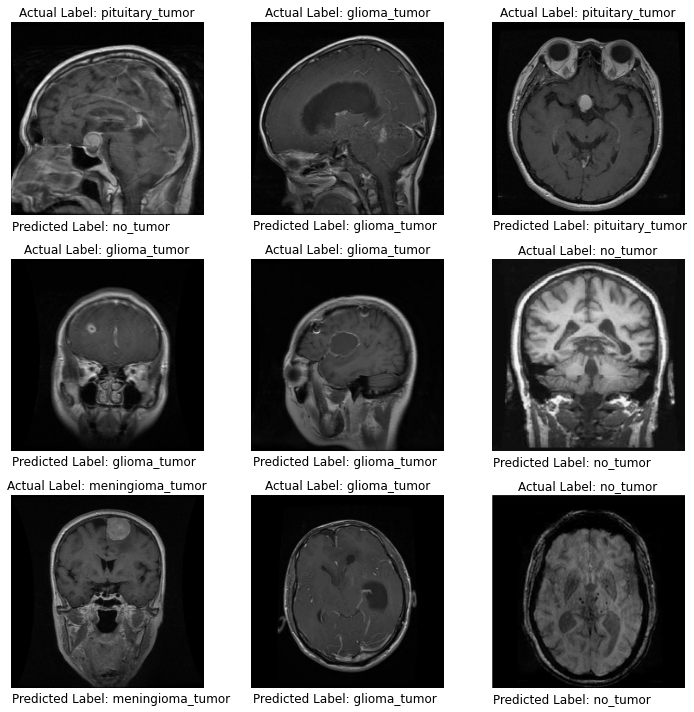

In [ ]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='Brain_tumor_classification',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

In [ ]:
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)


Loading deep_autoviml model from <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fd45cd1e290> folder. This will take time...

Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fd45cd1e290> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/data_folder/test
Found 394 files belonging to 4 classes.
    Sample predictions before inverse_transform: [3 2 3 0 2]
    Sample predictions after inverse_transform: ['pituitary_tumor' 'no_tumor' 'pituitary_tumor' 'glioma_tumor' 'no_tumor']


In [ ]:
print(predictions[-1])

['pituitary_tumor' 'no_tumor' 'pituitary_tumor' 'glioma_tumor' 'no_tumor'
 'pituitary_tumor' 'glioma_tumor' 'no_tumor' 'pituitary_tumor'
 'meningioma_tumor' 'no_tumor' 'pituitary_tumor' 'no_tumor'
 'pituitary_tumor' 'no_tumor' 'pituitary_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor' 'glioma_tumor' 'no_tumor'
 'pituitary_tumor' 'pituitary_tumor' 'glioma_tumor' 'meningioma_tumor'
 'no_tumor' 'no_tumor' 'glioma_tumor' 'pituitary_tumor' 'pituitary_tumor'
 'glioma_tumor' 'no_tumor' 'pituitary_tumor' 'no_tumor' 'meningioma_tumor'
 'pituitary_tumor' 'pituitary_tumor' 'glioma_tumor' 'pituitary_tumor'
 'meningioma_tumor' 'no_tumor' 'meningioma_tumor' 'pituitary_tumor'
 'no_tumor' 'meningioma_tumor' 'no_tumor' 'no_tumor' 'no_tumor' 'no_tumor'
 'no_tumor' 'glioma_tumor' 'meningioma_tumor' 'no_tumor' 'no_tumor'
 'meningioma_tumor' 'glioma_tumor' 'no_tumor' 'no_tumor'
 'meningioma_tumor' 'no_tumor' 'glioma_tumor' 'no_tumor